# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Préparation Données pour apprentissage


---

# Initialisations
---

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import numpy as np
import pandas as pd
import torch
import seaborn as sns
from tqdm.notebook import tqdm,trange
tqdm.pandas()

# Préparation Données

---

## Chargement

In [4]:
import patat.util.file

filename = 'data/prod/230517-OIDS-Label.pickle'

df_label = patat.util.file.pickle_load(filename)

## Labels ou textes Nuls

In [5]:
df_label['text'].isna().sum()

0

In [6]:
df_label['infox'].isna().sum()

4

In [7]:
df_label = df_label[df_label['infox'].notna()]

In [8]:
df_label.reset_index(inplace=True)

## Données dupliquées

In [9]:
df_label.duplicated(subset='text').sum()

0

In [10]:
df_label.duplicated(subset='url').sum()

0

## Equilibrage Dataset

<Axes: xlabel='infox', ylabel='count'>

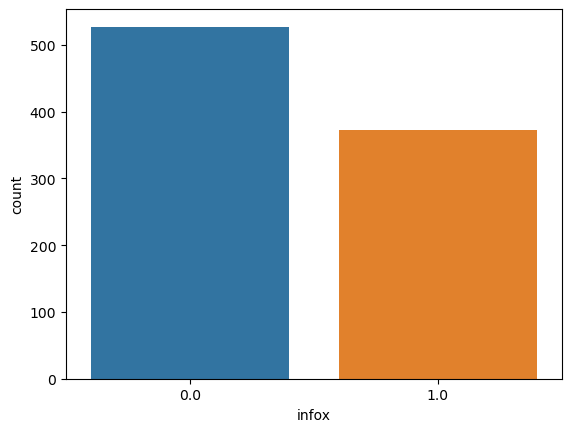

In [11]:
label_count = df_label['infox'].value_counts()
sns.barplot(x=label_count.index, y=label_count)

In [15]:
df_0 = df_label[df_label['infox'] == 0]
df_1 = df_label[df_label['infox'] == 1]

min_sample = min(len(df_0),len(df_1))


df_0=df_0.sample(min_sample,random_state=_rs)
df_1=df_1.sample(min_sample,random_state=_rs)
df_ml = pd.concat([df_0,df_1])

df_ml

,index,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h
609,610,https://www.francesoir.fr/politique-france/gue...,www.francesoir.fr,Guerre en Ukraine: Emmanuel Macron prévient le...,À l’occasion de la cérémonie pour le 78e anniv...,"[Accueil, Politique]",[À l’occasion de la cérémonie pour le 78e anni...,2022-08-20T00:00:00,,,...,0.0,0.0,,CN,Recueil,11,Guerre en Ukraine: Emmanuel Macron prévient le...,2629,239.000000,857bfacdd98e36dda26f1f92cf40c992904d6386
705,708,https://www.profession-gendarme.com/la-vaccina...,www.profession-gendarme.com,La vaccination Covid : un marquage de « type b...,De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonjo...,"[Actualités, Tribune]",[De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonj...,,,NaN,...,NaN,NaN,NaN,NaN,Test1,17,La vaccination Covid : un marquage de « type b...,6252,367.764706,166d32300f4d7766a82fe39a1185f35bc347c05f
26,26,https://www.mondialisation.ca/colonialisme-ene...,www.mondialisation.ca,Colonialisme énergétique,Visite d’État du président de la République it...,"[Moyen-Orient et Afrique du Nord, Guerre USA O...",[Visite d’État du président de la République i...,2022-07-09T00:00:00,,Pangea Grandangolo,...,0.0,NaN,,GP,Recueil,8,Colonialisme énergétique\nVisite d’État du pré...,2794,349.250000,2a39a60fd5e2c6df0f6ec8ce9fedc2ee2eb4ab4d
565,566,https://www.francesoir.fr/opinions-editos/de-l...,www.francesoir.fr,De l’importance d’une Assemblée vraiment natio...,"Depuis hier soir, ne serions-nous pas en train...","[Accueil, Opinions]","[Depuis hier soir, ne serions-nous pas en trai...",2022-06-20T19:46:00,,Xavier Azalbert,...,0.0,NaN,,GP,Recueil,16,De l’importance d’une Assemblée vraiment natio...,4582,286.375000,93b25370fea82c7039f7e2b00c0bd73151101af3
231,232,https://www.polemia.com/quelle-politique-migra...,www.polemia.com,Quelle politique migratoire pour la France ? –...,"Par André-Victor Robert, haut fonctionnaire ♦ ...","[Accueil, Géopolitique, Afrique, analyse, Andr...","[Facebook, Twitter, LinkedIn, Print Friendly, ...",,"Par André-Victor Robert, haut fonctionnaire ♦ ...",André Victor Robert,...,0.0,0.0,,FB,Recueil,31,Quelle politique migratoire pour la France ? –...,9123,294.290323,c12a81bb99810b5c13fba93abc5f9cea077a873d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,https://lesdeqodeurs.fr/des-scientifiques-de-h...,lesdeqodeurs.fr,Des scientifiques de Harvard et de Johns Hopki...,Article original datant du 31/08/22 par SSRNCO...,"[ARNm, COVID, effets secondaires, étude, Harva...",[Les étudiants des universités nord-américaine...,2022-09-23T00:00:00,,,...,0.0,0.0,1,FB,Recueil,5,Des scientifiques de Harvard et de Johns Hopki...,1803,360.600000,1f56ed5fa54de7c492154ac8ee0d8d10724f1aa4
157,158,https://www.voltairenet.org/article217546.html,www.voltairenet.org,L’armée russe achète des exemplaires d’armemen...,L’achat de deux canons automoteurs CAESAR fran...,[],[L’achat de deux canons automoteurs CAESAR fra...,1900-01-01T00:00:00,,,...,1.0,NaN,1,FB,Recueil,3,L’armée russe achète des exemplaires d’armemen...,718,239.333333,b3153ba0ad9e32c02a8d49c99a6748e0764b20b5
522,523,https://lemediaen442.fr/onu-le-premier-ministr...,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"[Politique, Vidéos, censure, jacinda ardern, ONU]",[L’argument principal de la ministre est que l...,2022-09-29T09:56:31+02:00,"Le terrible discours de Jacinda Ardern, Premie...",,...,0.0,0.0,1,FB,Recueil,7,ONU – Le Premier ministre de Nouvelle-Zélande ...,2420,345.714286,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb
847,853,https://fr.sott.net/article/36258-Pandemie-ou-...,fr.sott.net,Pandémie ou le retour du grand Pan,"Au cours des deux dernières décennies, les pub...",[La Science de l'Esprit],"[Au cours des deux dernières décennies, les pu...",,,NaN,...,NaN,NaN,NaN,NaN,Verif,59,Pandémie ou le retour du 

# Sauvegarde
---







In [16]:
filename = 'data/demo/230526-df_ml.pickle'
df_ml.to_pickle(filename)